In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from datetime import datetime
import geopandas as gpd

plt.style.use('ggplot')

In [2]:
def concatinate_data(list_file_name, folder_path = './data/'):
    df = pd.DataFrame()

    for file_name in list_file_name:
        df_cat = pd.read_csv(folder_path + file_name)
        df_cat['DateCollected'] = pd.to_datetime(df_cat['DateCollected'], dayfirst=True)
        df = pd.concat([df, df_cat], axis=0)

    df = df.reset_index()
    df = df.drop(columns={'index'})
    return df

In [3]:
from os import listdir

files = [datetime.strptime(f.replace('.csv', ''), '%d-%m-%Y') for f in listdir('./data/')]

three_newest_days = sorted(files)
df = concatinate_data(map(lambda date: date.strftime("%d-%m-%Y") + '.csv', three_newest_days))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country,Other     3016 non-null   object        
 1   TotalCases        3016 non-null   int64         
 2   NewCases          3016 non-null   float64       
 3   TotalDeaths       3016 non-null   float64       
 4   NewDeaths         3016 non-null   float64       
 5   TotalRecovered    2769 non-null   float64       
 6   NewRecovered      2769 non-null   float64       
 7   ActiveCases       2769 non-null   float64       
 8   Tot Cases/1M pop  3016 non-null   float64       
 9   Deaths/1M pop     3016 non-null   float64       
 10  TotalTests        3016 non-null   float64       
 11  Tests/ 1M pop     3016 non-null   float64       
 12  Population        3016 non-null   float64       
 13  Continent         3016 non-null   object        
 14  DateCollected     3016 n

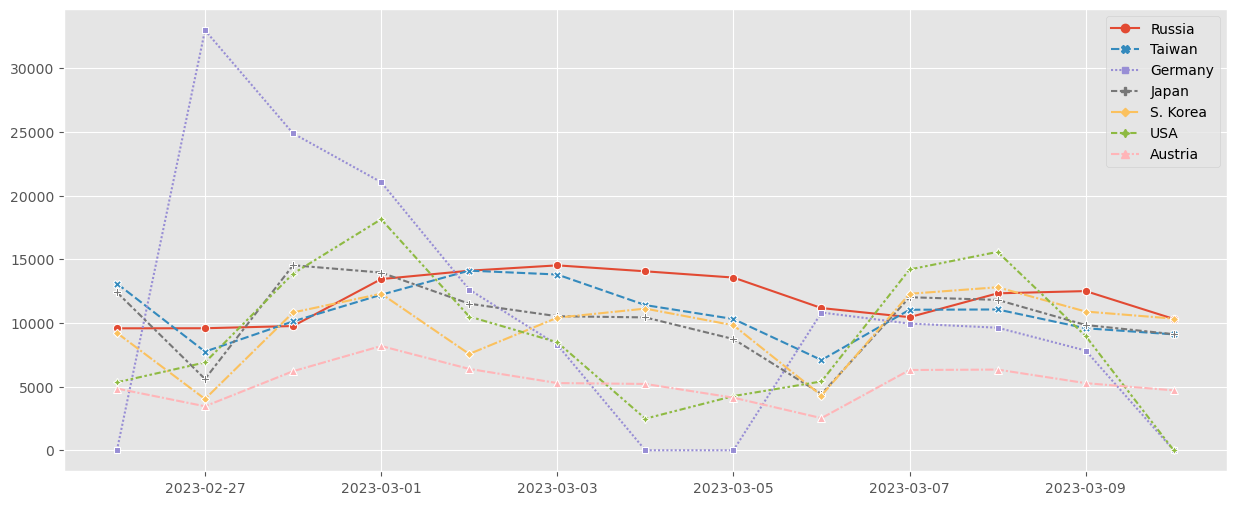

In [5]:
country_df = df[df['Country,Other'] != 'World']
most_newcases_country = country_df.groupby('Country,Other').sum()['NewCases'].sort_values(ascending=False).index[:7].to_list()
filtered_country_df = country_df[country_df['Country,Other'].str.contains('|'.join(most_newcases_country))]
filtered_country_df = filtered_country_df[['Country,Other', 'DateCollected', 'NewCases']].set_index('Country,Other')

new_cases_data = []
for country in most_newcases_country:
    new_cases_data.append(filtered_country_df.sort_values(by='DateCollected').loc[country]['NewCases'].to_list())

time_data = filtered_country_df['DateCollected'].unique()

new_cases_df = pd.DataFrame(data=new_cases_data, index=most_newcases_country, columns=time_data)

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=new_cases_df.T, markers=True);